**01: PROJECT WRANGLING/EDA**

1.	What is in your data?

CDC Diabetes Health Indicators dataset from Kaggle

Variables include:
Diabetes, High BP, High Cholesterol, Cholesterol Check, BMI, Smoker, Stroke, Heart Disease or Attack, Physical activity, Consumes Fruits, Consumes Veggies, Heavy Alcohol Consumption, Any Healthcare, No doctor because of cost, General Health, Mental Health, Physical Health, Difficulty Walking, Sex, Age, Education, Income


2. How will these data be useful for studying the phenomenon you're interested in?

As this data includes many common health indicators of diabetes, for example cholesterol and physical activity, it will be helpful to create a model to predict people’s risk of diabetes based on their current health status.


3.	What are the challenges you've resolved or expect to face in using them?

As the data is relatively clean already, the biggest challenge will be creating an effective and efficient model. With the nature of the dataset, we plan on using a Random Forest model to make predictions; however, we have minimal background with this style of machine learning. Therefore, a major challenge of this project will be learning and understanding this method before implementing it.


EDA

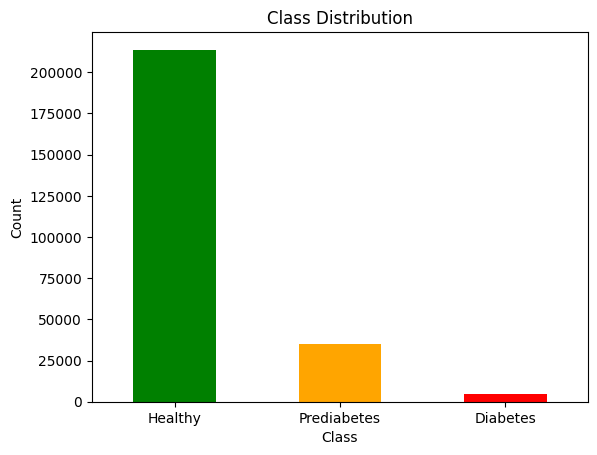

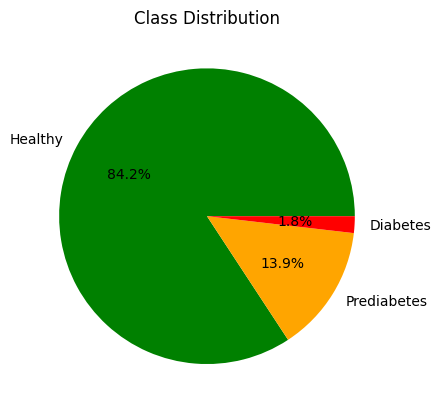

Numerical Feature Statistics:
         count       mean       std   min   25%   50%   75%   max  median
Age  253680.0   8.032119  3.054220   1.0   6.0   8.0  10.0  13.0     8.0
BMI  253680.0  28.382364  6.608694  12.0  24.0  27.0  31.0  98.0    27.0

Frequency count for HighBP:
HighBP
0.0    144851
1.0    108829
Name: count, dtype: int64

Frequency count for HighChol:
HighChol
0.0    146089
1.0    107591
Name: count, dtype: int64

Frequency count for PhysActivity:
PhysActivity
1.0    191920
0.0     61760
Name: count, dtype: int64


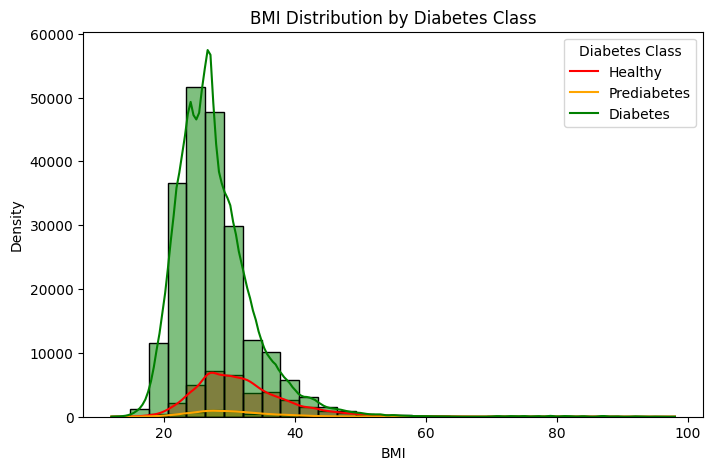

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


dataset = 'https://raw.githubusercontent.com/ashleynguyen04/DS3001-Project/refs/heads/main/diabetes_binary_health_indicators_BRFSS2015.csv'
df = pd.read_csv(dataset)

df.head()

# bar and pie chart
distribution = df['Diabetes_012'].value_counts()
distribution.plot(kind='bar', color=['green', 'orange', 'red'], title='Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Healthy', 'Prediabetes', 'Diabetes'], rotation=0)
plt.show()

#pie chart
distribution.plot(kind='pie', labels=['Healthy', 'Prediabetes', 'Diabetes'], autopct='%1.1f%%',
                  colors=['green', 'orange', 'red'], title='Class Distribution')
plt.ylabel('')
plt.show()

num_features = ['Age', 'BMI']
cat_features = ['HighBP', 'HighChol', 'PhysActivity']

#numerical summary
num_summary = df[num_features].describe().T
num_summary['median'] = df[num_features].median()
print("Numerical Feature Statistics:\n", num_summary)

# cat frequency counts
for col in cat_features:
    if col in df.columns:
        print(f"\nFrequency count for {col}:")
        print(df[col].value_counts())
    else:
        print(f"\nWarning: Column '{col}' not found in dataset.")

# histogram/KDE for BMI across diabetes groups
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='BMI', hue='Diabetes_012', kde=True, bins=30, palette=['green', 'orange', 'red'])
plt.title("BMI Distribution by Diabetes Class")
plt.xlabel("BMI")
plt.ylabel("Density")
plt.legend(title="Diabetes Class", labels=['Healthy', 'Prediabetes', 'Diabetes'])
plt.show()